In [299]:
import pandas as pd
import numpy as np
import seaborn as sns
date='23-05-2024-rust_1_2/'
target='gpu'


In [300]:
df_times = pd.concat([
  pd.read_csv(f'../data/{date}rust-{target}-times.csv'),
  pd.read_csv(f'../data/{date}python-{target}-times.csv'),
])
df_rewards = pd.concat([
  pd.read_csv(f'../data/{date}rust-{target}-rewards.csv'),
  pd.read_csv(f'../data/{date}python-{target}-rewards.csv'),
])
df = pd.concat([df_times, df_rewards], axis=1)

<Axes: ylabel='max_resident_set_size_kb'>

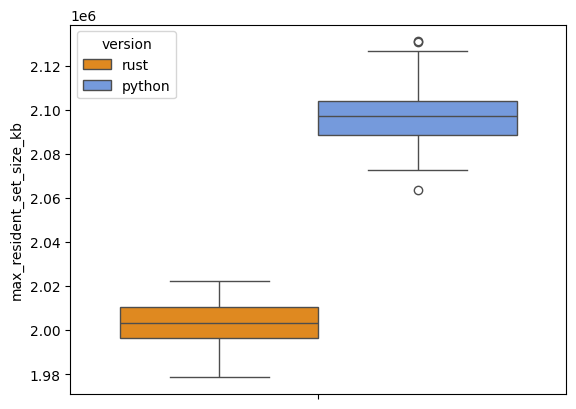

In [320]:
# Plot the responses for different events and regions
sns.boxplot(y="max_resident_set_size_kb",
            hue="version", palette=['darkorange', 'cornflowerblue'],
            data=df)

<Axes: ylabel='reward_mean'>

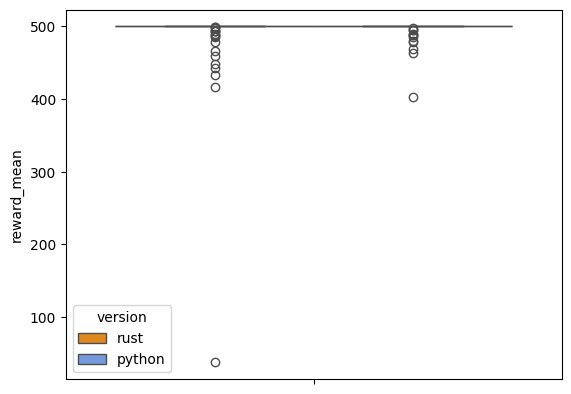

In [302]:
# Plot the responses for different events and regions
sns.boxplot(y="reward_mean",
            hue="version", palette=['darkorange', 'cornflowerblue'],
            data=df)

<Axes: xlabel='training_steps', ylabel='elapsed_real_time_seconds'>

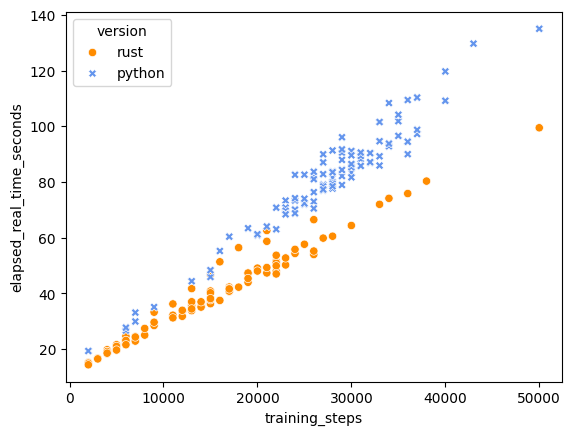

In [322]:
# Plot the responses for different events and regions
sns.scatterplot(x="training_steps", y="elapsed_real_time_seconds",
             hue="version", style="version", palette=['darkorange', 'cornflowerblue'],
             data=df)

# Time and CPU

In [304]:
df.groupby('version')['elapsed_real_time_seconds'].describe()

,count,mean,std,min,25%,50%,75%,max
version,,,,,,,,
python,100.0,80.1399,19.957598,19.36,71.6625,82.71,90.3725,134.97
rust,100.0,38.8128,16.591327,14.41,23.9100,37.02,49.4650,99.45


In [305]:
df.groupby('version')['user_cpu_seconds'].describe()

,count,mean,std,min,25%,50%,75%,max
version,,,,,,,,
python,100.0,70.3251,19.788527,9.79,61.6675,72.87,80.4800,124.32
rust,100.0,30.2275,16.436015,6.38,15.1850,28.70,40.5475,90.35


In [306]:
df.groupby('version')['kernel_cpu_seconds'].describe()

,count,mean,std,min,25%,50%,75%,max
version,,,,,,,,
python,100.0,8.1697,0.154361,7.69,8.0800,8.18,8.2725,8.50
rust,100.0,7.7101,0.158685,7.40,7.5975,7.69,7.8425,8.19


In [307]:
df['cpu_percentage'] = df['cpu_percentage'].str[:-1].astype(int)
df.groupby('version')['cpu_percentage'].describe()

,count,mean,std,min,25%,50%,75%,max
version,,,,,,,,
python,100.0,97.23,1.354789,88.0,97.0,97.0,98.0,99.0
rust,100.0,96.80,1.477098,91.0,96.0,97.0,98.0,99.0


# Memory

'max_resident_set_size_kb',
'system_page_size_bytes',
'major_page_faults',
'minor_page_faults',

In [308]:
df.groupby('version')['max_resident_set_size_kb'].describe()

,count,mean,std,min,25%,50%,75%,max
version,,,,,,,,
python,100.0,2097651.64,12604.490578,2063808.0,2088794.0,2097448.0,2104237.0,2131124.0
rust,100.0,2002778.48,10109.905626,1978688.0,1996727.0,2003380.0,2010574.0,2022460.0


In [309]:
df.groupby('version')['major_page_faults'].describe()

,count,mean,std,min,25%,50%,75%,max
version,,,,,,,,
python,100.0,1.69,16.9,0.0,0.0,0.0,0.0,169.0
rust,100.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0


In [310]:
df.groupby('version')['minor_page_faults'].describe()

,count,mean,std,min,25%,50%,75%,max
version,,,,,,,,
python,100.0,302775.32,12443.972518,284462.0,292009.50,297916.0,315909.75,327147.0
rust,100.0,270789.97,13686.192568,243616.0,261403.25,271265.5,283363.50,291891.0


# SO

'involuntary_context_switches',
'voluntary_context_switches', 
'filesystem_input_reads',
'filesystem_output_writes',

In [311]:
df.groupby('version')['involuntary_context_switches'].describe()

,count,mean,std,min,25%,50%,75%,max
version,,,,,,,,
python,100.0,196.81,35.10869,130.0,175.0,191.5,210.25,326.0
rust,100.0,122.62,22.41292,97.0,109.0,115.0,125.25,224.0


In [312]:
df.groupby('version')['voluntary_context_switches'].describe()

,count,mean,std,min,25%,50%,75%,max
version,,,,,,,,
python,100.0,35026.75,8405.381230,10008.0,31253.0,36284.5,40038.5,59234.0
rust,100.0,17684.99,9017.824706,3565.0,10510.5,16851.0,23877.0,52415.0


In [313]:
df.groupby('version')['filesystem_input_reads'].describe()

,count,mean,std,min,25%,50%,75%,max
version,,,,,,,,
python,100.0,901.04,9010.4,0.0,0.0,0.0,0.0,90104.0
rust,100.0,0.08,0.8,0.0,0.0,0.0,0.0,8.0


In [314]:
df.groupby('version')['filesystem_output_writes'].describe()

,count,mean,std,min,25%,50%,75%,max
version,,,,,,,,
python,100.0,16.0,0.0,16.0,16.0,16.0,16.0,16.0
rust,100.0,8.0,0.0,8.0,8.0,8.0,8.0,8.0


# Rewards

In [315]:
df.groupby('version')['training_steps'].describe()

,count,mean,std,min,25%,50%,75%,max
version,,,,,,,,
python,100.0,27140.0,7960.787738,2000.0,24000.0,28000.0,31250.0,50000.0
rust,100.0,14820.0,9075.864319,2000.0,7000.0,14000.0,21000.0,50000.0


In [316]:
df.groupby('version')['reward_mean'].describe()

,count,mean,std,min,25%,50%,75%,max
version,,,,,,,,
python,100.0,497.329,11.256740,402.700000,500.0,500.0,500.0,500.0
rust,100.0,491.103,47.898511,37.700001,500.0,500.0,500.0,500.0


In [317]:
df.groupby('version')['reward_std'].describe()

,count,mean,std,min,25%,50%,75%,max
version,,,,,,,,
python,100.0,4.814688,18.093653,0.0,0.0,0.0,0.0,120.085012
rust,100.0,7.874364,23.342987,0.0,0.0,0.0,0.0,122.699997


In [318]:
df['time/step'] = df['elapsed_real_time_seconds'] / df['training_steps']
df.groupby('version')['time/step'].describe()

,count,mean,std,min,25%,50%,75%,max
version,,,,,,,,
python,100.0,0.003095,0.000767,0.002499,0.002830,0.002932,0.003097,0.009680
rust,100.0,0.003116,0.001113,0.001989,0.002348,0.002704,0.003526,0.007615


In [319]:
# 	count	mean	std	min	25%	50%	75%	max
# version								
# python	100.0	0.003890	0.000649	0.003239	0.003589	0.003766	0.004094	0.009245
# rust	100.0	0.002552	0.000104	0.002339	0.002483	0.002533	0.002608	0.002864